In [51]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import statsmodels.api as sm

SyntaxError: invalid syntax (<ipython-input-51-1f545aac7cc2>, line 7)

Wczytaj dane opisujące ilość plam słonecznych w okresie od 1700 do 2008 r.

https://www.statsmodels.org/dev/examples/notebooks/generated/tsa_arma_0.html

In [3]:
import pandas as pd
series = pd.read_csv('./sunspots.csv', index_col = 'YEAR', squeeze = True, parse_dates=['YEAR'])

# series = Series.from_csv('./sunspots.csv', header=0)
series.head()

YEAR
1700-01-01     5.0
1701-01-01    11.0
1702-01-01    16.0
1703-01-01    23.0
1704-01-01    36.0
Name: SUNACTIVITY, dtype: float64

In [4]:
series.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
series.index

DatetimeIndex(['1700-12-31', '1701-12-31', '1702-12-31', '1703-12-31',
               '1704-12-31', '1705-12-31', '1706-12-31', '1707-12-31',
               '1708-12-31', '1709-12-31',
               ...
               '1999-12-31', '2000-12-31', '2001-12-31', '2002-12-31',
               '2003-12-31', '2004-12-31', '2005-12-31', '2006-12-31',
               '2007-12-31', '2008-12-31'],
              dtype='datetime64[ns]', length=309, freq=None)

# Zadanie
Narysuj szereg czasowy

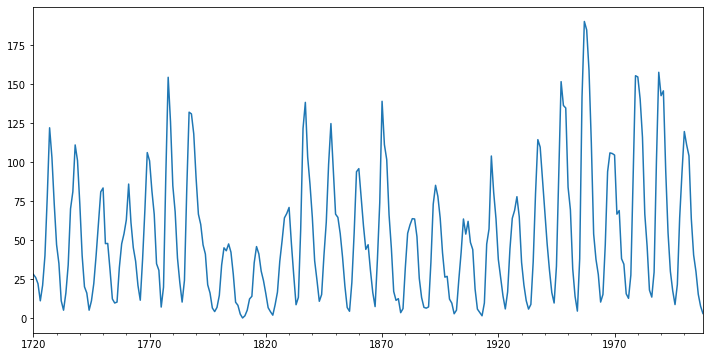

In [5]:
plt.figure(figsize=(12,6));
series.loc['1720':].plot()
plt.show()

### Zanim zdecydujemy, który model ma być używany, musimy przyjrzeć się autokorelacji.

Poleca się stosowanie następujących zasad:

<b>Zasada 1:</b> Jeśli ACF wykazuje rozkłady wykładnicze, a PACF ma skok przy opóźnieniu 1 oraz nie ma korelacji dla innych opóźnień to użyj jednego parametru autoregresji (p).

<b>Zasada 2:</b> Jeśli ACF ma kształt sinusoidy lub powtarzający się wzorzec w kształcie funkcji wykładniczej, a PACF ma skoki przy opóźnieniach 1 i 2 oraz nie ma korelacji dla innych opóźnień to użyj parametrów autoregresji (p) równej dwa.

<b>Zasada 3:</b> Jeśli ACF ma skok w punkcie 1 i nie ma korelacji z innymi opóźnieniami, a PACF maleje wykładniczo to użyj parametru średniej ruchomej (q) równego jeden.

<b>Zasada 4:</b> Jeśli ACF ma skoki przy opóźnieniach 1 i 2 i nie ma korelacji z innymi opóźnieniami, a PACF ma kształt sinusoidy lub zespół rozkładów wykładniczych to użyj parametrów średniej ruchomej (q) równej dwa.

<b>Zasada 5:</b> Jeśli ACF i PACF wygląda jak funkcja wykładnicza zaczynająca się od opóźnienia 1 to użyj parametru autoregresji (p =1) i parametru średniej ruchu (q=1).



# Zadanie
Narysuj funkcję:
- ACF
- PACF

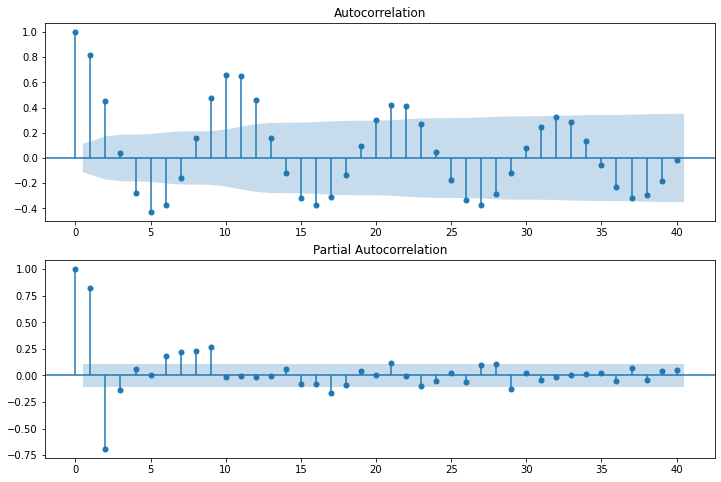

In [6]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(series.values, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(series.values, lags=40, ax=ax2)
plt.show()

### Statystyka Durbin-Watson

- Innym popularnym testem korelacji szeregowej jest statystyka Durbin-Watson. Statystyczna wartość DW mieści się w przedziale 0-4. 
- Dodatnia korelacja jest związana z wartościami DW poniżej 2 a ujemna korelacja z wartościami DW powyżej 2.
- Wartość statystyki Durbin-Watson wynosi blisko 2, jeśli błędy nie są ze sobą powiązane.

# Zadanie
Wykonaj test Durbina Watsona

In [7]:
sm.stats.durbin_watson(series)

0.13952892659903304

# AR(1) = ARMA(2,0)

Korzystając z zasady 2, najpierw spróbujemy model ARMA(2,0) z dwoma warunkami autoregresji i bez średnich kroczących.

In [8]:
arma_mod20 = sm.tsa.ARMA(series, (2,0)).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-DEC

Wypiszmy parametry modelu

In [9]:
print(arma_mod20.params)

const                49.659146
ar.L1.SUNACTIVITY     1.390656
ar.L2.SUNACTIVITY    -0.688571
dtype: float64


Teraz obliczamy Akaike Information Criterion (AIC), Bayesian Information Criterion (BIC) oraz Hannan-Quinn Information Criterion (HQIC). Naszym celem jest wybranie modelu, który minimalizuje (AIC, BIC, HQIC).

In [10]:
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

2622.636338069966 2637.5697031775567 2628.606725915212


# Analiza Residuals

Test Durbin-Watson nie wykazuje autokorelacji.

In [11]:
sm.stats.durbin_watson(arma_mod20.resid.values)

2.1458273497661597

Możemy narysować błędy (Residuals)

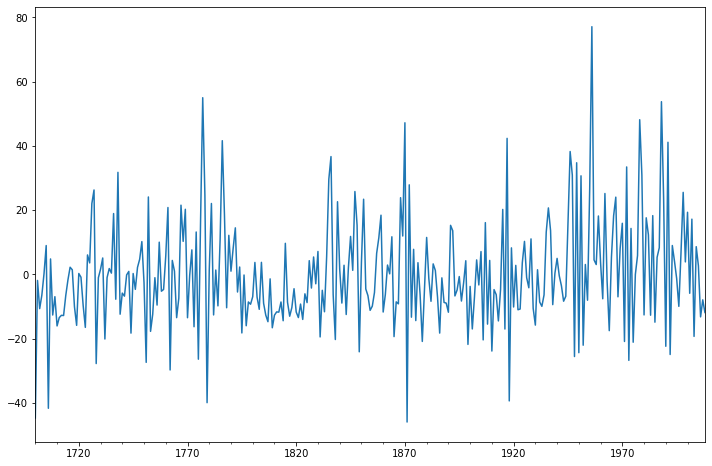

In [12]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod20.resid.plot(ax=ax);
plt.show()

Możemy sprawdzić ząłorznei o rozkłdzie normalnym błędów.

In [13]:
import scipy.stats as stats
resid20 = arma_mod20.resid
stats.normaltest(resid20)

NormaltestResult(statistic=41.736036360039975, pvalue=8.65236548402949e-10)

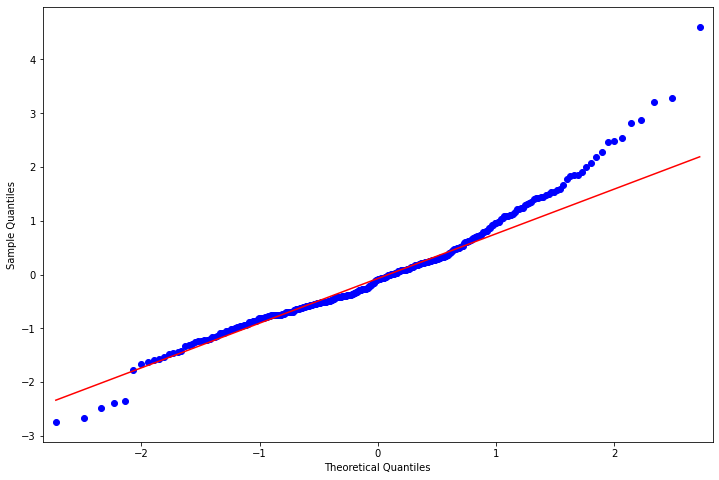

In [14]:
from statsmodels.graphics.api import qqplot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid20, line='q', ax=ax, fit=True)
plt.show()

Możemy sprawdzić autokorelację dla błędów

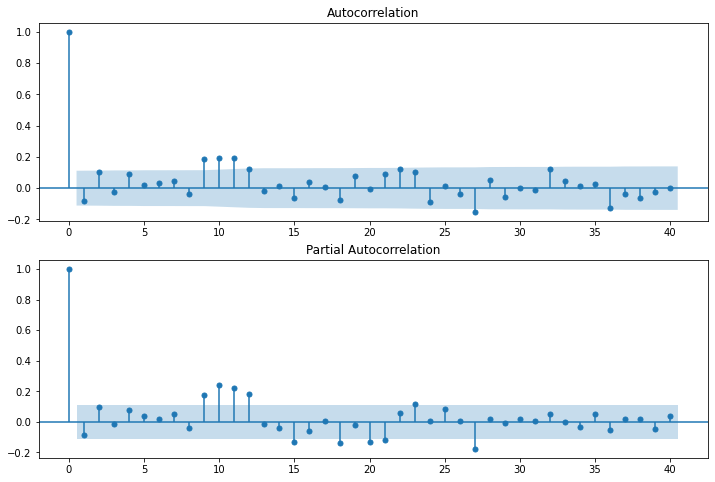

In [15]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid20.values, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid20.values, lags=40, ax=ax2)
plt.show()

Możemy wypisać pełna informację o modelu:

In [16]:
print(arma_mod20.summary())

                              ARMA Model Results                              
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                     ARMA(2, 0)   Log Likelihood               -1307.318
Method:                       css-mle   S.D. of innovations             16.576
Date:                Sun, 28 Nov 2021   AIC                           2622.636
Time:                        14:54:57   BIC                           2637.570
Sample:                    12-31-1700   HQIC                          2628.607
                         - 12-31-2008                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                49.6591      3.165     15.689      0.000      43.455      55.863
ar.L1.SUNACTIVITY     1.3907      0.041     33.954      0.000       1.310       1.471
ar.L2.SUNACTIVITY    -0.

## Wykonajmy predykcję 

In [17]:
predict_sunspots20 = arma_mod20.predict('1990', '2012', dynamic=True)
print(predict_sunspots20)

1990-12-31    164.966741
1991-12-31    135.687352
1992-12-31     89.897274
1993-12-31     46.379983
1994-12-31     17.392141
1995-12-31      7.044786
1996-12-31     12.615372
1997-12-31     27.487030
1998-12-31     44.332642
1999-12-31     57.518894
2000-12-31     64.257028
2001-12-31     64.547778
2002-12-31     60.312427
2003-12-31     54.222309
2004-12-31     48.669392
2005-12-31     45.140676
2006-12-31     44.057026
2007-12-31     44.979814
2008-12-31     47.009264
2009-12-31     49.196126
2010-12-31     50.839877
2011-12-31     51.619959
2012-12-31     51.572944
Freq: A-DEC, dtype: float64


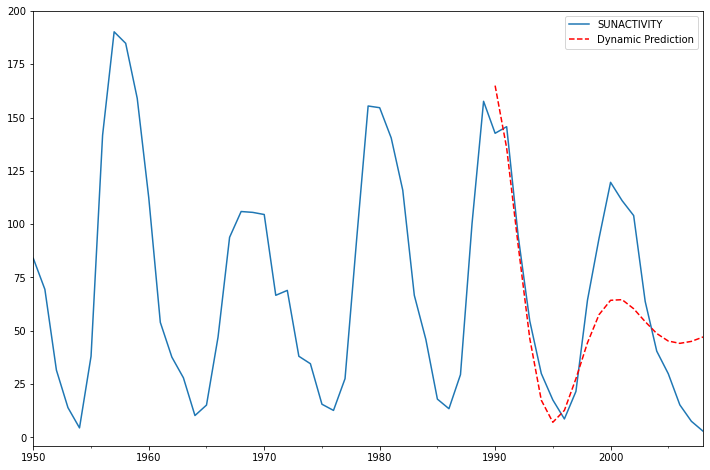

In [18]:
ax = series.loc['1950':].plot(figsize=(12,8))
predict_sunspots20.plot(ax=ax, style='r--', label='Dynamic Prediction');
ax.legend();
ax.axis((-20.0, 38.0, -4.0, 200.0));
plt.show()

Możemy policzyć jeszcze błąd:

In [19]:
def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()
def mean_absolute_err(y, yhat):
    return np.mean((np.abs(y.sub(yhat).mean()) / yhat)) # or percent error = * 100

In [20]:
print("MFE = ", mean_forecast_err(series, predict_sunspots20))
print ("MAE = ", mean_absolute_err(series, predict_sunspots20))

MFE =  4.730635372542676
MAE =  0.13469826871900242


# Zadanie
Naucz model ARMA(3,0) oraz:
- wykonaj test Durbin-Watsona
- sprawdź korelację dla błędów
- wykonaj predykcję

# ARMA(3,0)

In [21]:
arma_mod30 = sm.tsa.ARMA(series, (3,0)).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-DEC

Teraz obliczamy Akaike Information Criterion (AIC), Bayesian Information Criterion (BIC) oraz Hannan-Quinn Information Criterion (HQIC). Naszym celem jest wybranie modelu, który minimalizuje (AIC, BIC, HQIC).

In [22]:
print(arma_mod30.aic, arma_mod30.bic, arma_mod30.hqic)

2619.403628699991 2638.0703350844797 2626.866613506548


In [23]:
sm.stats.durbin_watson(arma_mod30.resid.values)

1.9564807026824922

Możemy sprawdzić autokorelację dla błędów

In [24]:
resid30 = arma_mod30.resid

In [25]:
stats.normaltest(resid30)

NormaltestResult(statistic=49.84497596148759, pvalue=1.5007245760709733e-11)

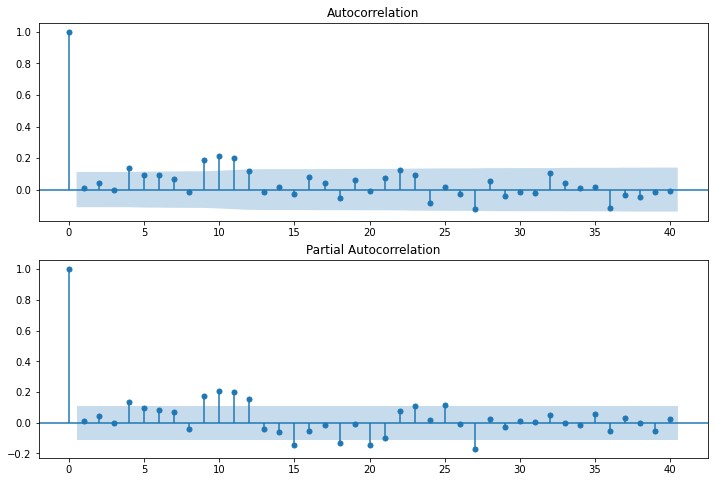

In [26]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid30.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid30, lags=40, ax=ax2)
plt.show()

## Wykonajmy predykcję 

In [27]:
predict_sunspots30 = arma_mod30.predict('1990', '2012', dynamic=True)
print(predict_sunspots30)

1990-12-31    167.047479
1991-12-31    140.993137
1992-12-31     94.859308
1993-12-31     46.861123
1994-12-31     11.242807
1995-12-31     -4.721089
1996-12-31     -1.166730
1997-12-31     16.185856
1998-12-31     39.022042
1999-12-31     59.450035
2000-12-31     72.170315
2001-12-31     75.376964
2002-12-31     70.436641
2003-12-31     60.731765
2004-12-31     50.201968
2005-12-31     42.076191
2006-12-31     38.114447
2007-12-31     38.454803
2008-12-31     41.963978
2009-12-31     46.869456
2010-12-31     51.423435
2011-12-31     54.399896
2012-12-31     55.321870
Freq: A-DEC, dtype: float64


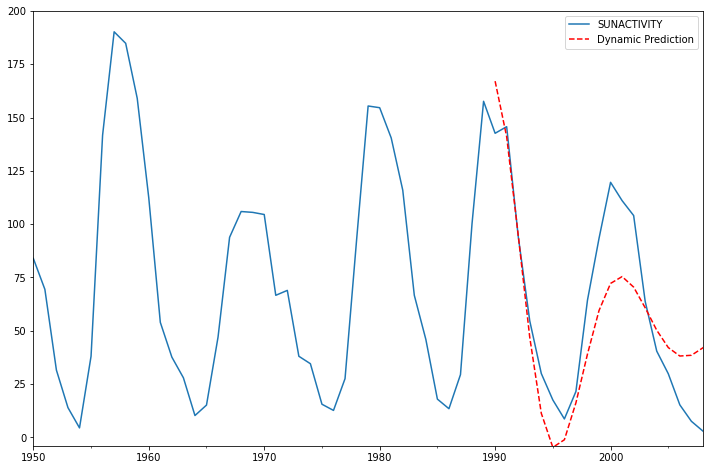

In [28]:
ax = series.loc['1950':].plot(figsize=(12,8))
ax = predict_sunspots30.plot(ax=ax, style='r--', label='Dynamic Prediction');
ax.legend();
ax.axis((-20.0, 38.0, -4.0, 200.0));
plt.show()

In [29]:
print("MFE = ", mean_forecast_err(series, predict_sunspots30))
print("MAE = ", mean_absolute_err(series, predict_sunspots30))

MFE =  5.636787413425104
MAE =  -0.14116280450879318


In [30]:
print(arma_mod30.summary())

                              ARMA Model Results                              
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                     ARMA(3, 0)   Log Likelihood               -1304.702
Method:                       css-mle   S.D. of innovations             16.435
Date:                Sun, 28 Nov 2021   AIC                           2619.404
Time:                        14:55:07   BIC                           2638.070
Sample:                    12-31-1700   HQIC                          2626.867
                         - 12-31-2008                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                49.7501      2.778     17.907      0.000      44.305      55.195
ar.L1.SUNACTIVITY     1.3008      0.056     23.079      0.000       1.190       1.411
ar.L2.SUNACTIVITY    -0.

# Zadanie
Naucz model ARMA(2,1) oraz:
- wykonaj test Durbin-Watsona
- sprawdź korelację dla błędów
- wykonaj predykcję

# ARMA(2,1)

In [31]:
arma_mod40 = sm.tsa.ARMA(series, (2,1)).fit()
#print(arma_mod40.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-DEC

In [32]:
res40 = arma_mod40.resid

In [33]:
print (arma_mod40.params)

const                49.749300
ar.L1.SUNACTIVITY     1.470738
ar.L2.SUNACTIVITY    -0.755121
ma.L1.SUNACTIVITY    -0.153691
dtype: float64


Teraz obliczamy Akaike Information Criterion (AIC), Bayesian Information Criterion (BIC) oraz Hannan-Quinn Information Criterion (HQIC). Naszym celem jest wybranie modelu, który minimalizuje (AIC, BIC, HQIC).

In [34]:
print(arma_mod40.aic, arma_mod40.bic, arma_mod40.hqic)

2620.277191557815 2638.943897942304 2627.7401763643725


Możemy sprawdzić autokorelację dla błędów

In [35]:
resid40 = arma_mod40.resid

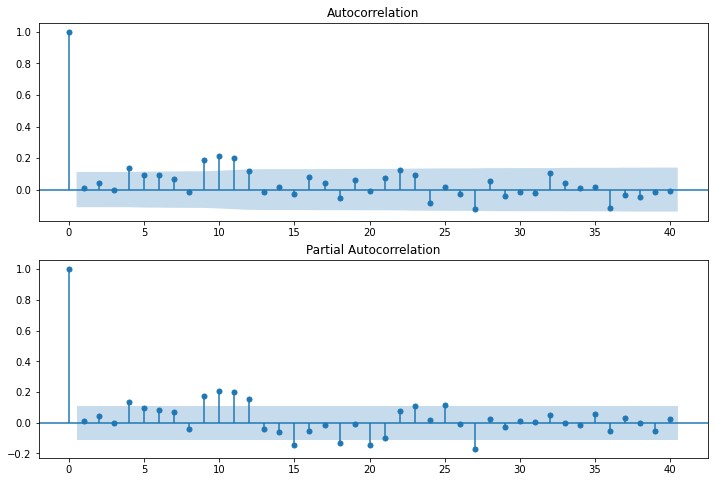

In [36]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid30.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid30, lags=40, ax=ax2)
plt.show()

In [37]:
print(arma_mod40.summary())

                              ARMA Model Results                              
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                     ARMA(2, 1)   Log Likelihood               -1305.139
Method:                       css-mle   S.D. of innovations             16.458
Date:                Sun, 28 Nov 2021   AIC                           2620.277
Time:                        14:55:11   BIC                           2638.944
Sample:                    12-31-1700   HQIC                          2627.740
                         - 12-31-2008                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                49.7493      2.790     17.832      0.000      44.281      55.217
ar.L1.SUNACTIVITY     1.4707      0.050     29.566      0.000       1.373       1.568
ar.L2.SUNACTIVITY    -0.

## Wykonajmy predykcję 

In [38]:
predict_sunspots40 = arma_mod40.predict('1990', '2012', dynamic=True)

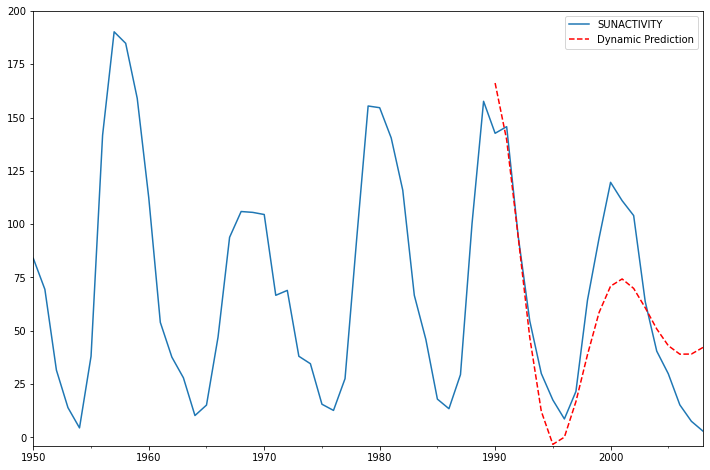

In [39]:
ax = series.loc['1950':].plot(figsize=(12,8))
ax = predict_sunspots40.plot(ax=ax, style='r--', label='Dynamic Prediction');
ax.legend();
ax.axis((-20.0, 38.0, -4.0, 200.0));
plt.show()

In [40]:
print(arma_mod40.summary())

                              ARMA Model Results                              
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                     ARMA(2, 1)   Log Likelihood               -1305.139
Method:                       css-mle   S.D. of innovations             16.458
Date:                Sun, 28 Nov 2021   AIC                           2620.277
Time:                        14:55:13   BIC                           2638.944
Sample:                    12-31-1700   HQIC                          2627.740
                         - 12-31-2008                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                49.7493      2.790     17.832      0.000      44.281      55.217
ar.L1.SUNACTIVITY     1.4707      0.050     29.566      0.000       1.373       1.568
ar.L2.SUNACTIVITY    -0.

# Zadanie
Naucz model ARMA(2,3) oraz:
- wykonaj test Durbin-Watsona
- sprawdź korelację dla błędów
- wykonaj predykcję

# ARMA(2,3)

In [41]:
arma_mod50 = sm.tsa.ARMA(series, (2,3)).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-DEC

## Wykonajmy predykcję

In [42]:
predict_sunspots50 = arma_mod50.predict('1990', '2012', dynamic=True)

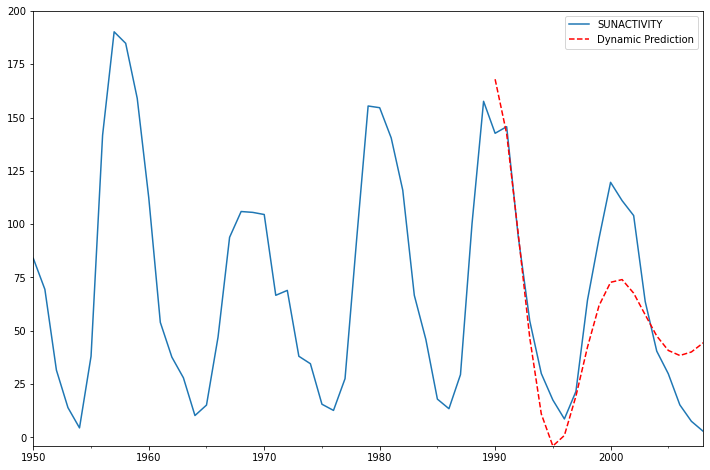

In [43]:
ax = series.loc['1950':].plot(figsize=(12,8))
ax = predict_sunspots50.plot(ax=ax, style='r--', label='Dynamic Prediction');
ax.legend();
ax.axis((-20.0, 38.0, -4.0, 200.0));
plt.show()

# Zadanie
Naucz model ARMA(3,2) oraz:
- wykonaj test Durbin-Watsona
- sprawdź korelację dla błędów
- wykonaj predykcję

# ARMA(3,2)

In [44]:
#arima_mod1 = sm.tsa.ARIMA(series, (3,0,2)).fit()
arima_mod1 = sm.tsa.ARMA(series, (3,2)).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-DEC

In [45]:
print (arima_mod1.params)

const                48.486703
ar.L1.SUNACTIVITY     2.560638
ar.L2.SUNACTIVITY    -2.471097
ar.L3.SUNACTIVITY     0.892055
ma.L1.SUNACTIVITY    -1.518372
ma.L2.SUNACTIVITY     0.663744
dtype: float64


In [46]:
resid1 = arima_mod1.resid

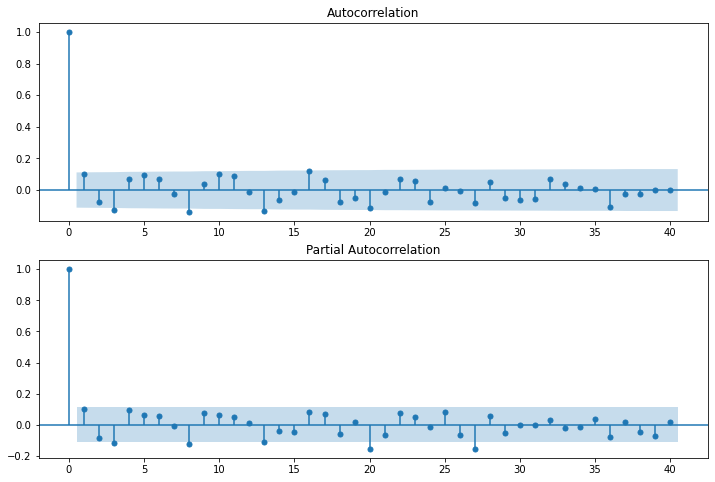

In [47]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid1.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid1, lags=40, ax=ax2)
plt.show()

## Wykonajmy predykcję

In [48]:
predict_sunspots1 = arima_mod1.predict('1990', '2012', dynamic=True)

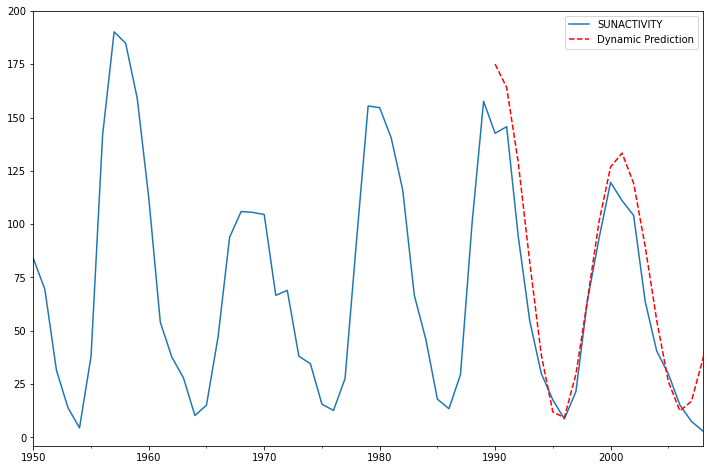

In [49]:
ax = series.loc['1950':].plot(figsize=(12,8))
ax = predict_sunspots1.plot(ax=ax, style='r--', label='Dynamic Prediction');
ax.legend();
ax.axis((-20.0, 38.0, -4.0, 200.0));
plt.show()

In [50]:
print(arima_mod1.summary())

                              ARMA Model Results                              
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                     ARMA(3, 2)   Log Likelihood               -1283.786
Method:                       css-mle   S.D. of innovations             15.328
Date:                Sun, 28 Nov 2021   AIC                           2581.572
Time:                        14:55:21   BIC                           2607.706
Sample:                    12-31-1700   HQIC                          2592.020
                         - 12-31-2008                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                48.4867      6.613      7.332      0.000      35.525      61.448
ar.L1.SUNACTIVITY     2.5606      0.031     83.854      0.000       2.501       2.620
ar.L2.SUNACTIVITY    -2.

# Wnioski

Oczywiście model 5 minimalizuje (aic, bic, hqic). 

Model 1 ma jednak najmniejszy MFE i MAE. 

Pod względem konsystencji model 2 minimalizuje AIC, BIC, HQIC, MFE i MAE. 

Również ARIMA(3,0,2) ma najmniejsze wartości AIC, BIC i HQIC, choć widać nadmieny overfiting. 

Zauważ, że ARIMA(2,0,3) i ARMA(2,3) to te same modele.

# Można sprawdzać wiele modeli:

In [55]:
arma_mod10 = sm.tsa.ARMA(series, (1,0)).fit()
arma_mod20 = sm.tsa.ARMA(series, (2,0)).fit()
arma_mod30 = sm.tsa.ARMA(series, (3,0)).fit()
arma_mod40 = sm.tsa.ARMA(series, (2,1)).fit()
arma_mod50 = sm.tsa.ARMA(series, (2,3)).fit()
arima_mod1 = sm.tsa.ARIMA(series, (3,0,2)).fit()
arima_mod2 = sm.tsa.ARIMA(series, (2,0,2)).fit()
arima_mod3 = sm.tsa.ARIMA(series, (1,0,0)).fit()
arima_mod4 = sm.tsa.ARIMA(series, (0,1,0)).fit()
arima_mod5 = sm.tsa.ARIMA(series, (0,0,1)).fit()
arima_mod6 = sm.tsa.ARIMA(series, (1,1,0)).fit()
arima_mod7 = sm.tsa.ARIMA(series, (0,1,1)).fit()
arima_mod8 = sm.tsa.ARIMA(series, (1,1,1)).fit()
arima_mod9 = sm.tsa.ARIMA(series, (3,0,3)).fit()
arima_mod10= sm.tsa.ARIMA(series, (1,0,6)).fit()
arima_mod11= sm.tsa.ARIMA(series, (1,0,3)).fit()

C:\Users\przem\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
C:\Users\przem\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
C:\Users\przem\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
C:\Users\przem\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
C:\Users\przem\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py

In [111]:
print("Model 01: ARMA(1,0)     AIC", arma_mod20.aic, " BIC", arma_mod20.bic, " HQIC", arma_mod20.hqic)
print("Model 02: ARMA(2,0)     AIC", arma_mod20.aic, " BIC", arma_mod20.bic, " HQIC", arma_mod20.hqic)
print("Model 03: ARMA(3,0)     AIC", arma_mod30.aic, " BIC", arma_mod30.bic, " HQIC", arma_mod30.hqic)
print("Model 04: ARMA(2,1)     AIC", arma_mod40.aic, "BIC", arma_mod40.bic, " HQIC", arma_mod40.hqic)
print("Model 05: ARMA(2,3)     AIC", arma_mod50.aic, " BIC", arma_mod50.bic, " HQIC", arma_mod50.hqic)
print("Model 06: ARIMA(3,0,2)  AIC", arima_mod1.aic, " BIC", arima_mod1.bic, " HQIC", arima_mod1.hqic)
print("Model 07: ARIMA(2,0,2)  AIC", arima_mod2.aic, " BIC", arima_mod2.bic, " HQIC", arima_mod2.hqic)
print("Model 08: ARIMA(1,0,0)  AIC", arima_mod3.aic, " BIC", arima_mod3.bic, " HQIC", arima_mod3.hqic)
print("Model 09: ARIMA(0,1,0)  AIC", arima_mod4.aic, " BIC", arima_mod4.bic, " HQIC", arima_mod4.hqic)
print("Model 10: ARIMA(0,0,1)  AIC", arima_mod5.aic, " BIC", arima_mod5.bic, " HQIC", arima_mod5.hqic)
print("Model 11: ARIMA(1,1,0)  AIC", arima_mod6.aic, " BIC", arima_mod6.bic, " HQIC", arima_mod6.hqic)
print("Model 12: ARIMA(0,1,1)  AIC", arima_mod7.aic, " BIC", arima_mod7.bic, " HQIC", arima_mod7.hqic)
print("Model 13: ARIMA(1,1,1)  AIC", arima_mod8.aic, " BIC", arima_mod8.bic, " HQIC", arima_mod8.hqic)
print("Model 14: ARIMA(3,0,3)  AIC", arima_mod9.aic, " BIC", arima_mod9.bic, " HQIC", arima_mod9.hqic)
print("Model 15: ARIMA(1,0,6)  AIC", arima_mod10.aic, " BIC", arima_mod10.bic, " HQIC", arima_mod10.hqic)
print("Model 16: ARIMA(1,0,3)  AIC", arima_mod11.aic, " BIC", arima_mod11.bic, " HQIC", arima_mod11.hqic)

Model 01: ARMA(1,0)     AIC 2622.6363380639814  BIC 2637.56970317  HQIC 2628.60672591
Model 02: ARMA(2,0)     AIC 2622.6363380639814  BIC 2637.56970317  HQIC 2628.60672591
Model 03: ARMA(3,0)     AIC 2619.403628696475  BIC 2638.07033508  HQIC 2626.8666135
Model 04: ARMA(2,1)     AIC 2620.277191556711 BIC 2638.94389794  HQIC 2627.74017636
Model 05: ARMA(2,3)     AIC 2622.8516907827516  BIC 2648.98507972  HQIC 2633.29986951
Model 06: ARIMA(3,0,2)  AIC 2581.5722990083814  BIC 2607.70568795  HQIC 2592.02047774
Model 07: ARIMA(2,0,2)  AIC 2620.872695816994  BIC 2643.27274348  HQIC 2629.82827758
Model 08: ARIMA(1,0,0)  AIC 2819.169152442845  BIC 2830.36917627  HQIC 2823.64694333
Model 09: ARIMA(0,1,0)  AIC 2835.1157734  BIC 2842.57597297  HQIC 2838.09870518
Model 10: ARIMA(0,0,1)  AIC 2886.9006685925715  BIC 2898.10069242  HQIC 2891.37845948
Model 11: ARIMA(1,1,0)  AIC 2730.689777420153  BIC 2741.88007677  HQIC 2735.16417509
Model 12: ARIMA(0,1,1)  AIC 2743.278276627907  BIC 2754.46857598  H

In [112]:
predict_sunspots10 = arma_mod10.predict('1990', '2012', dynamic=True)
predict_sunspots20 = arma_mod20.predict('1990', '2012', dynamic=True)
predict_sunspots30 = arma_mod30.predict('1990', '2012', dynamic=True)
predict_sunspots40 = arma_mod40.predict('1990', '2012', dynamic=True)
predict_sunspots50 = arma_mod50.predict('1990', '2012', dynamic=True)
predict_sunspots1 = arima_mod1.predict('1990', '2012', dynamic=True)
predict_sunspots2 = arima_mod2.predict('1990', '2012', dynamic=True)
predict_sunspots3 = arima_mod3.predict('1990', '2012', dynamic=True)
predict_sunspots4 = arima_mod4.predict('1990', '2012', dynamic=True)
predict_sunspots5 = arima_mod5.predict('1990', '2012', dynamic=True)
predict_sunspots6 = arima_mod6.predict('1990', '2012', dynamic=True)
predict_sunspots7 = arima_mod7.predict('1990', '2012', dynamic=True)
predict_sunspots8 = arima_mod8.predict('1990', '2012', dynamic=True)
predict_sunspots9 = arima_mod9.predict('1990', '2012', dynamic=True)
predict_sunspots10 = arima_mod10.predict('1990', '2012', dynamic=True)
predict_sunspots11 = arima_mod11.predict('1990', '2012', dynamic=True)

D:\Anaconda3\lib\site-packages\statsmodels\base\data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


In [114]:
print("Metrics for Model 01 ARMA(1,0):    ",mean_forecast_err(series, predict_sunspots10)," MFE  ", mean_absolute_err(series, predict_sunspots10),"MAE") 
print("Metrics for Model 02 ARMA(2,0):    ",mean_forecast_err(series, predict_sunspots20)," MFE  ", mean_absolute_err(series, predict_sunspots20),"MAE") 
print("Metrics for Model 03 ARMA(3,0):    ",mean_forecast_err(series, predict_sunspots30)," MFE  ", mean_absolute_err(series, predict_sunspots30),"MAE") 
print("Metrics for Model 04 ARMA(2,1):    ",mean_forecast_err(series, predict_sunspots40)," MFE  ", mean_absolute_err(series, predict_sunspots40),"MAE") 
print("Metrics for Model 05 ARMA(2,3):    ",mean_forecast_err(series, predict_sunspots50)," MFE  ", mean_absolute_err(series, predict_sunspots50),"MAE") 
print("Metrics for Model 06 ARIMA(3,0,2): ",mean_forecast_err(series, predict_sunspots1)," MFE  ", mean_absolute_err(series, predict_sunspots1),"MAE") 
print("Metrics for Model 07 ARIMA(2,0,2): ",mean_forecast_err(series, predict_sunspots2)," MFE  ", mean_absolute_err(series, predict_sunspots2),"MAE") 
print("Metrics for Model 08 ARIMA(1,0,0): ",mean_forecast_err(series, predict_sunspots3)," MFE  ", mean_absolute_err(series, predict_sunspots3),"MAE") 
print("Metrics for Model 09 ARIMA(0,1,0): ",mean_forecast_err(series, predict_sunspots4)," MFE  ", mean_absolute_err(series, predict_sunspots4),"MAE")
print("Metrics for Model 10 ARIMA(0,0,1): ",mean_forecast_err(series, predict_sunspots5)," MFE  ", mean_absolute_err(series, predict_sunspots5),"MAE") 
print("Metrics for Model 11 ARIMA(1,1,0): ",mean_forecast_err(series, predict_sunspots6)," MFE  ", mean_absolute_err(series, predict_sunspots6),"MAE") 
print("Metrics for Model 12 ARIMA(0,1,1): ",mean_forecast_err(series, predict_sunspots7)," MFE  ", mean_absolute_err(series, predict_sunspots7),"MAE") 
print("Metrics for Model 13 ARIMA(1,1,1): ",mean_forecast_err(series, predict_sunspots8)," MFE  ", mean_absolute_err(series, predict_sunspots8),"MAE") 
print("Metrics for Model 14 ARIMA(3,0,3): ",mean_forecast_err(series, predict_sunspots9)," MFE  ", mean_absolute_err(series, predict_sunspots9),"MAE") 
print("Metrics for Model 15 ARIMA(1,0,6): ",mean_forecast_err(series, predict_sunspots10)," MFE  ", mean_absolute_err(series, predict_sunspots10),"MAE") 
print("Metrics for Model 16 ARIMA(1,0,3): ",mean_forecast_err(series, predict_sunspots11)," MFE  ", mean_absolute_err(series, predict_sunspots11),"MAE") 
      

Metrics for Model 01 ARMA(1,0):     2.4634783413409793  MFE   0.04916314201861694 MAE
Metrics for Model 02 ARMA(2,0):     4.730437376819153  MFE   0.1346906768301532 MAE
Metrics for Model 03 ARMA(3,0):     5.636961675275295  MFE   -0.14113178723355474 MAE
Metrics for Model 04 ARMA(2,1):     5.651928894195339  MFE   4.822612667552202 MAE
Metrics for Model 05 ARMA(2,3):     5.277557122851105  MFE   0.3252746315891806 MAE
Metrics for Model 06 ARIMA(3,0,2):  -13.393742649130314  MFE   0.3574317181679279 MAE
Metrics for Model 07 ARIMA(2,0,2):  5.26202469738349  MFE   0.21582775732783616 MAE
Metrics for Model 08 ARIMA(1,0,0):  -13.30964247301857  MFE   0.2074590952264925 MAE
Metrics for Model 09 ARIMA(0,1,0):  61.3962918660287  MFE   -9004.789473684332 MAE
Metrics for Model 10 ARIMA(0,0,1):  9.301487227138372  MFE   0.1835444054943031 MAE
Metrics for Model 11 ARIMA(1,1,0):  57.850286822844126  MFE   19238.720551322334 MAE
Metrics for Model 12 ARIMA(0,1,1):  60.73063670130523  MFE   -17762.63